# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


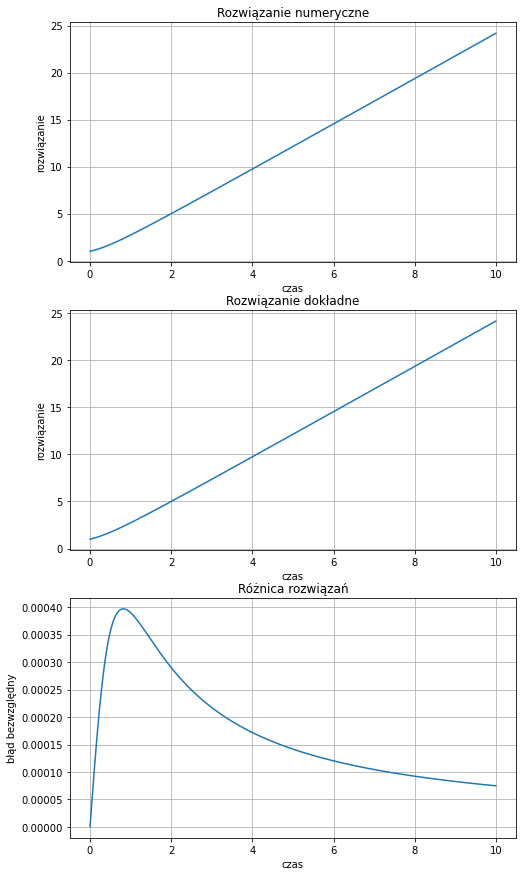

In [2]:
y0 = np.array([1])
t_span = np.arange(0, 10, step=0.001)

def fun1(t): 
    return t + np.sqrt(1 + 2 * t ** 2)
def fun2(t, x):
    return (x + t) / (x - t)

result_euler = main.solve_euler(fun2, t_span, y0)
result_accurate = fun1(t_span)

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(t_span, result_euler[0])
plt.title('Rozwiązanie numeryczne')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_span, result_accurate)
plt.title('Rozwiązanie dokładne')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_span, np.abs(result_euler[0] - result_accurate))
plt.title('Różnica rozwiązań')
plt.xlabel('czas')
plt.ylabel('błąd bezwzględny')
plt.grid()
plt.show()


***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

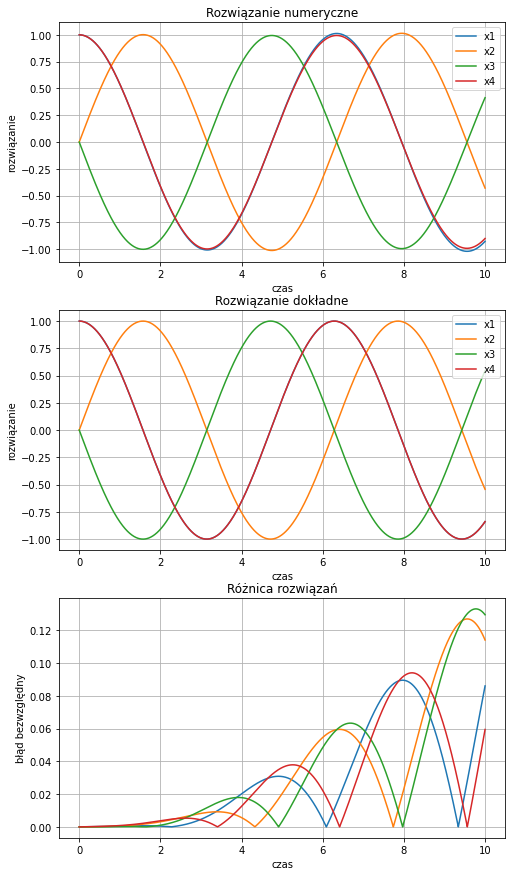

In [3]:
x0 = [1, 0, 0, 1]
t_span = np.arange(0, 10, step=0.001)

def fun1(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0] ** 2 + x[1] ** 2) ** (3 / 2))
    x4 = -x[1] / ((x[0] ** 2 + x[1] ** 2) ** (3 / 2))
    return np.array([x1, x2, x3, x4])

def fun2(t):
    return np.array([np.cos(t), np.sin(t), -np.sin(t), np.cos(t)])

result_euler = main.solve_euler(fun1, t_span, x0)
result_accurate = fun2(t_span)


fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(t_span, result_euler[0], label='x1')
plt.plot(t_span, result_euler[1], label='x2')
plt.plot(t_span, result_euler[2], label='x3')
plt.plot(t_span, result_euler[3], label='x4')
plt.title('Rozwiązanie numeryczne')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_span, result_accurate[0], label='x1')
plt.plot(t_span, result_accurate[1], label='x2')
plt.plot(t_span, result_accurate[2], label='x3')
plt.plot(t_span, result_accurate[3], label='x4')
plt.title('Rozwiązanie dokładne')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
for i in [0, 1, 2, 3]:
    plt.plot(t_span, np.abs(result_accurate[i] - result_euler[i]))
plt.title('Różnica rozwiązań')
plt.xlabel('czas')
plt.ylabel('błąd bezwzględny')
plt.grid()
plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

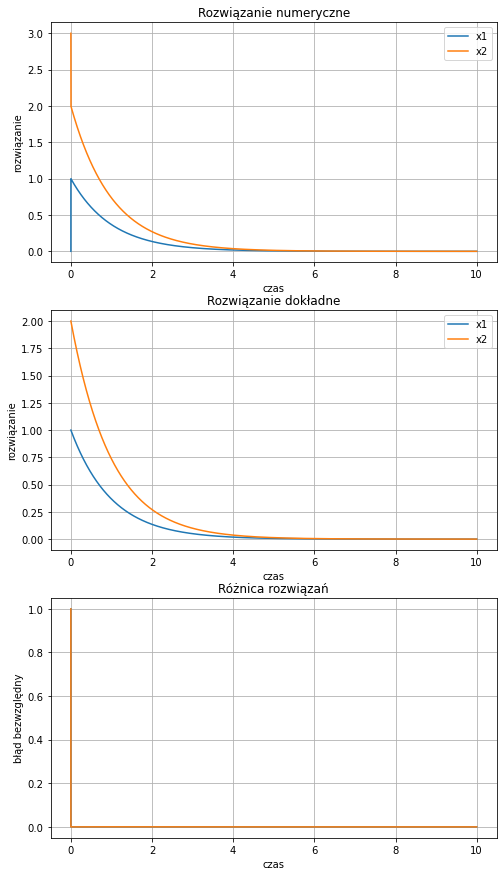

In [8]:
x0 = [0, 3]
t_span = np.arange(0, 10, step=0.001)

def fun1(t, x):
    A = np.array([[-667, 333], [666, -334]])
    return A @ x

def fun2(t):
    return [np.exp(-t), 2 * np.exp(-t)]

result_euler = main.solve_euler(fun1, t_span, x0)
result_accurate = fun2(t_span)

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(t_span, result_euler[0], label='x1')
plt.plot(t_span, result_euler[1], label='x2')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.title('Rozwiązanie numeryczne')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_span, result_accurate[0], label='x1')
plt.plot(t_span, result_accurate[1], label='x2')
plt.title('Rozwiązanie dokładne')
plt.ylabel('rozwiązanie')
plt.xlabel("czas")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
for i in [0, 1]:
    plt.plot(t_span, np.abs(result_accurate[i] - result_euler[i]))
plt.title('Różnica rozwiązań')
plt.xlabel('czas')
plt.ylabel('błąd bezwzględny')
plt.grid()
plt.show()

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

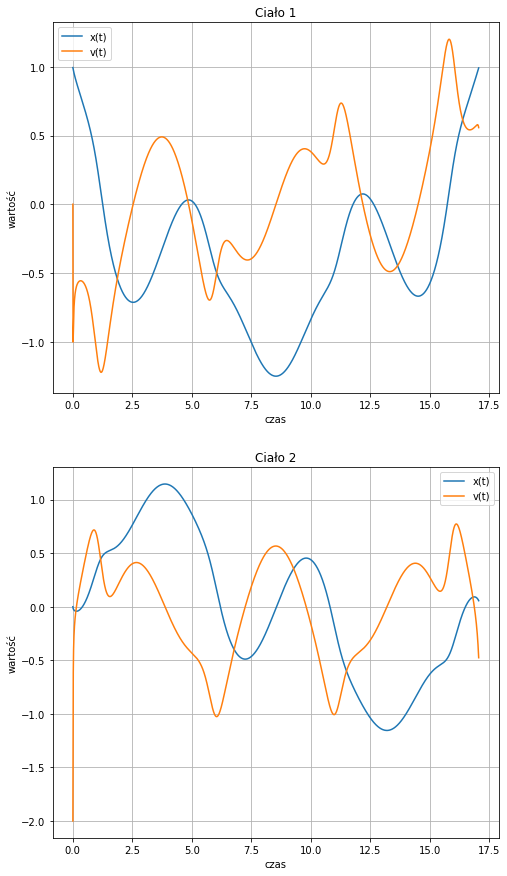

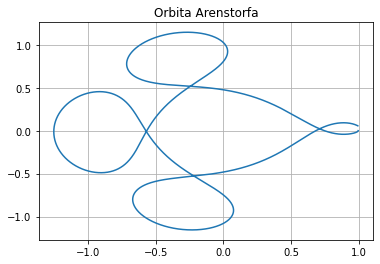

In [7]:
x0 = [0.994, 0, 0, -2.00158510637908252240537862224]
T = 17.0652165601579625588917206249
t_span = np.arange(0, T, step=0.00001)

def arenstorf_orbit(t, x):
    u = 0.012277471
    D1 = ((x[0] + u) ** 2 + (x[2]) ** 2) ** (3 / 2)
    D2 = ((x[0] - (1 - u)) ** 2 + (x[2]) ** 2) ** (3 / 2)
    
    x1 = x[1]
    x2 = x[0] + 2*x[3] - (1-u)*((x[0]+u)/D1) - u*((x[0]-(1-u))/D2)
    x3 = x[3]
    x4 = x[2] - 2*x[1] - (1-u)*(x[2]/D1) - u*(x[2]/D2)
    
    return x1, x2, x3, x4

orbit = main.solve_euler(arenstorf_orbit, t_span, x0)

fig = plt.figure(figsize=(8,15))

plt.subplot(2, 1, 1)
plt.plot(t_span, orbit[0], label='x(t)')
plt.plot(t_span, orbit[1], label='v(t)')
plt.title('Ciało 1')
plt.xlabel('czas')
plt.ylabel('wartość')
plt.legend() 
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_span, orbit[2], label='x(t)')
plt.plot(t_span, orbit[3], label='v(t)')
plt.title('Ciało 2')
plt.xlabel('czas')
plt.ylabel('wartość')
plt.legend() 
plt.grid()
plt.show()

plt.plot(orbit[0], orbit[2])
plt.title('Orbita Arenstorfa')
plt.grid()
plt.show()

WNIOSKI
Zapoznałem się z numerycznymi metodami rozwiązywania równań różniczkowych zwyczajnych z warunkiem początkowym. Skorzystałem z funkcji umożliwiającej rozwiązanie takich układów wykorzystując metodę Eulera w przód. Wyniki takich rozwiązań nie odbiegają w znaczący sposób od dokładnych.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
